# Graphing Birth-Death-Dispersal Processes

Run each box in order for code to work



In [1]:
## IMPORTS
import matplotlib.pyplot as plt
import random
import math as math
import networkx as nx
import numpy as np
import time

In [2]:
## Gets a random number between 1 and 10 of nodes to die. Chooses a node to be 
## deleted (death process) based on the survival rate of each node. Once the 
## node to be removed is chosen it is removed from the graph and its fecundity
## and survival rates are removed from the two lists.
def death(G): ## Keeps track of survival list throughout instead of remaking it each time
    numdeath = int(np.random.uniform(10)) #arbitrary for now and gets the number of nodes to be 'killed'

    # This loop goes through each chosen index in the source list and removes them from the graph
    for i in range(numdeath):
        # This will choose a random index of a node in G weighted by survival rates
        source = random.choices(list(survival_rates.keys()), weights = list(survival_rates.values()))[0]
        G.remove_node(source) # remove from graph
        del survival_rates[source] # delete from the survival dictionary
        del fecundity_rates[source] # delete from the fecundity dictionary

    # After the removals have occured the graph's fecundity and survival need to be adjusted
    fecundity(G)
    survival_rate(G)


In [3]:
## Function picks one node to be the source of a dispersal based on the fecundity
## of the node. Once the source node is identified the number of other nodes the
## source will disperse calculated as a function of the source degree. Then the
## children nodes are disperesed randomly within a radius defined by r_dispersal.
def disperse(G, r_dispersal, pos_n):
    # Chooses random node index in G weighted by fecundity    
    source = random.choices(list(fecundity_rates.keys()), weights = list(fecundity_rates.values()))[0] # random number of population based on fecundity 
    
    xicoord = G.nodes[source]["attr_dict"]['x'] # grab x
    yicoord = G.nodes[source]["attr_dict"]['y'] # grab y coordinate
        
    children = int(10 * math.exp(-0.1 * G.degree(source))) # number of children it will have, based on desmos
    for j in range(children):
        added = False
        while(added==False):
            # random radius length normally distributed and random angle uniformly distributed
            rand_r = np.random.uniform(r_dispersal) #radius between 0 and r_dispersal
            rand_theta = random.uniform(0,2*math.pi) #angle in radians
            xjcoord = rand_r*math.cos(rand_theta) + xicoord
            yjcoord = rand_r*math.sin(rand_theta) + yicoord
    
            # add the node
            if (xjcoord <= 2000 and yjcoord <= 2000 and xjcoord >= 0 and yjcoord >= 0): # Include to force window to be constant
                G.add_node(pos_n,attr_dict={"x":xjcoord,"y":yjcoord})
                connect(G, pos_n)
                pos_n = pos_n + 1
                added = True
    return pos_n

In [4]:
## Function that takes the entire graph G, and calculates the distance between 
## all the nodes in the graph. When a the distance between two nodes in the 
## graph is found to be less than the radius 'r_nieghborhood' the two nodes are
## connected. At the end of the function the fecundity and survival rates are 
## recalculated.
def connect_all(G,r_nieghborhood):
    for i in G:
        xicoord = G.nodes[i]["attr_dict"]['x']
        yicoord = G.nodes[i]["attr_dict"]['y']
        for j in G:
            xjcoord = G.nodes[j]["attr_dict"]['x']
            yjcoord = G.nodes[j]["attr_dict"]['y']
            if (i!=j): # I do not need to connect a point to itself
                ridistance = math.sqrt((xicoord-xjcoord)**2+(yicoord-yjcoord)**2) # finding radial distance
                # if the distance between points indexed at i and j are less than my radius I append them to groupi
                if (ridistance <= r_nieghborhood):
                    #print(ridistance)
                    G.add_edge(i,j)
                    
    fecundity(G)
    survival_rate(G)

In [5]:
## Function that takes a node 'node' and the entire graph G, and calculates the 
## distance between 'node' and all other nodes in the graph. When a the distance
## between 'node' and another node in the graph is found to be less than the 
## radius 'r_nieghborhood' the two nodes are connected. At the end of the 
## function the fecundity and survival rates are recalculated.
def connect(G, node):
    xicoord = G.nodes[node]["attr_dict"]['x']
    yicoord = G.nodes[node]["attr_dict"]['y']
    
    for j in G:
        xjcoord = G.nodes[j]["attr_dict"]['x']  #WM: I'm curious about why single quotes are used here as opposed to the double, used above
        yjcoord = G.nodes[j]["attr_dict"]['y']
        if (node!=j): # I do not need to connect a point to itself
            ridistance = math.sqrt((xicoord-xjcoord)**2+(yicoord-yjcoord)**2) # finding radial distance
            # if the distance between points indexed at i and j are less than my radius I append them to groupi
            if (ridistance <= r_nieghborhood):
                #print(ridistance)
                G.add_edge(node,j)
    
    fecundity(G)
    survival_rate(G)

In [6]:
## Function will take our graph G and graph all nodes and their connections
def my_grapher(G):
    pos = nx.spring_layout(G) #WM: You may not need "spring_layout" here
    for i in G:
        pos[i]=[G.nodes[i]["attr_dict"]['x'],G.nodes[i]["attr_dict"]['y']]
   
    fig = plt.figure(facecolor='w')
    
    xmax = 2000
    xmin = 0
    ymax = 2000
    ymin = 0
    
    ax = fig.add_subplot(121)
    nx.draw(G,pos,node_size = 5) #to include ax again do ax=ax
    limits=plt.axis('on')
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

    plt.subplot(1, 2, 2)
    plt.bar(height=nx.degree_histogram(G),x=list(range(0,len(nx.degree_histogram(G)))))


In [7]:
## This function applies a fecundity to each node based upon degree
## (higher degree means lower fecundity). The fecundity is used as weights
## to determine which node will be the source of a dispersal.
def fecundity(G):
    for i in G:
        fecundity_rates[i] = math.exp(-G.degree(i)) # to add in a fecundity dictionary

In [8]:
## This function applies a survival rate to each node based upon degree (higher 
## degree means lower survival rate). The survival rate is used as weights
## to determine which node will be deleted from the graph (death process).
def survival_rate(G):
    for i in G:
        survival_rates[i] = math.exp(G.degree(i)) # Putting the survival rate for i as a function of the degrees of the node i

In [9]:
## This function allows you to pick a specific windowed view and will show side
## by side a windowed view of the graph and a histograph that shows degree
## frquency within the window.
def window(G,xmin,xmax,ymin,ymax):
    window_degree = []
    for i in G:
        x = G.nodes[i]["attr_dict"]['x']
        y = G.nodes[i]["attr_dict"]['y']
        if (x>=xmin and x<=xmax and y>=ymin and y<=ymax):
            window_degree.append(G.degree[i])
            
    # GRAPH THE WINDOW
    pos = nx.spring_layout(G)
    for i in G:
        pos[i]=[G.nodes[i]["attr_dict"]['x'],G.nodes[i]["attr_dict"]['y']]
   
    fig = plt.figure(facecolor='w')
    
    ax = fig.add_subplot(121, xlim=(xmin,xmax), ylim=(ymin,ymax))
    nx.draw(G,pos,node_size = 5,ax=ax)
    limits=plt.axis('on')
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

    plt.subplot(1, 2, 2)
    plt.hist(window_degree)
    

# Start here to generate new data

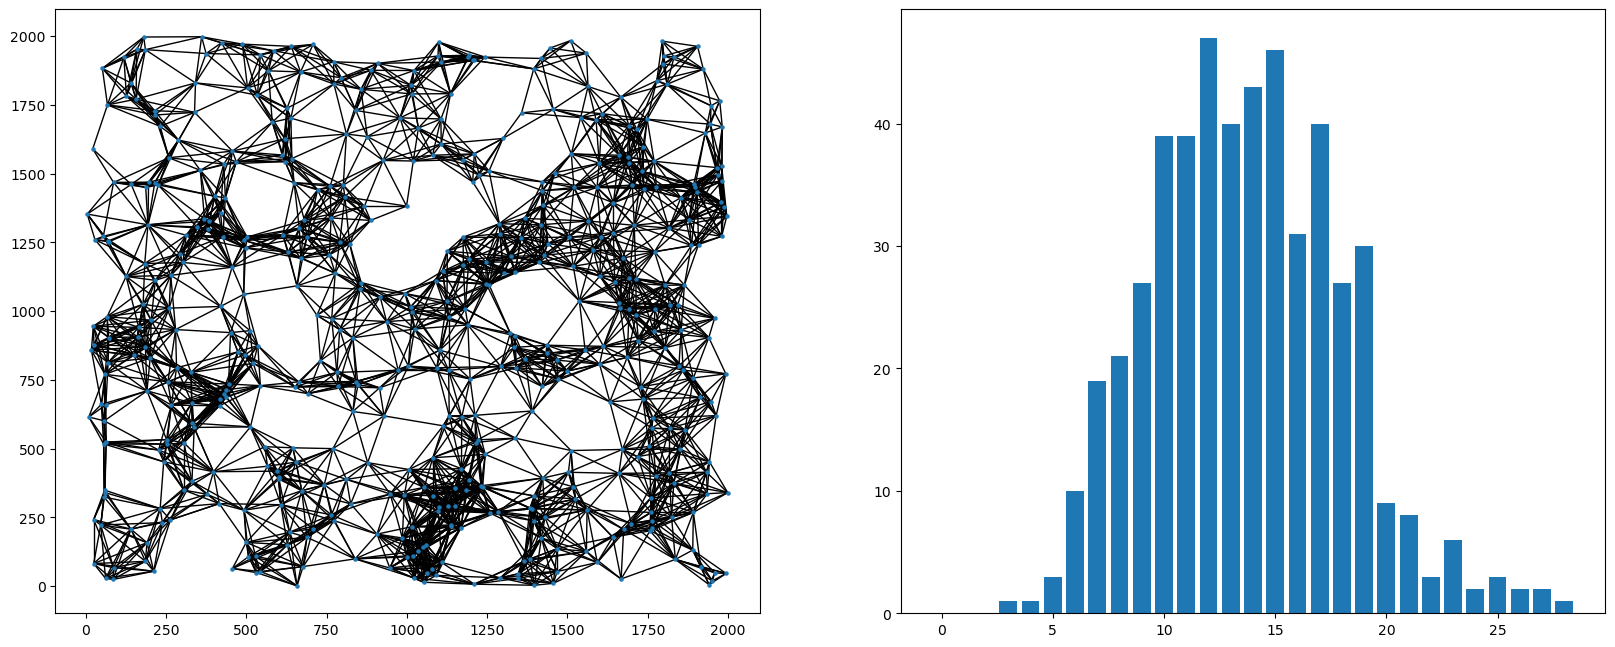

In [10]:
n = 500 # Initial number of points
y1 = 0 # Minimum y value
y2 = 2000 # Maximum y value
x1 = 0 # Minimum x value
x2 = 2000 # Maximum x value
pos_n = 0 # Used purely for indexing in the data structure that holds the nodes
r_dispersal = 100 # dispersal radius (set to 100)
r_nieghborhood = 100 # This is the radius used to connect points (set to 100)
G = nx.Graph() # Creating an empty graph
survival_rates = {} # this is a dictionary that holds the survival rate for each node in the graph indexed at the key
fecundity_rates = {} # empty dictionary that holds the fecundity as values and the node as key.

plt.rcParams['figure.figsize'] = [20, 8] # Configures window size. 
plt.rcParams['figure.dpi'] = 100 

# Instantiate the points to be plotted
for i in range(n):
    G.add_node(i,attr_dict={"x":random.randint(x1,x2),"y":random.randint(y1,y2)})
    pos_n = pos_n + 1

# Connect and graph initial random points.
connect_all(G,r_nieghborhood)
fecundity(G)
survival_rate(G)
my_grapher(G)

## Keep track of size of graph
Size = [n]

In [12]:
# First 100 iterations
for i in range(100):
    pos_n = disperse(G,r_dispersal,pos_n)
    death(G)
    Size.append(G.size())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


1684


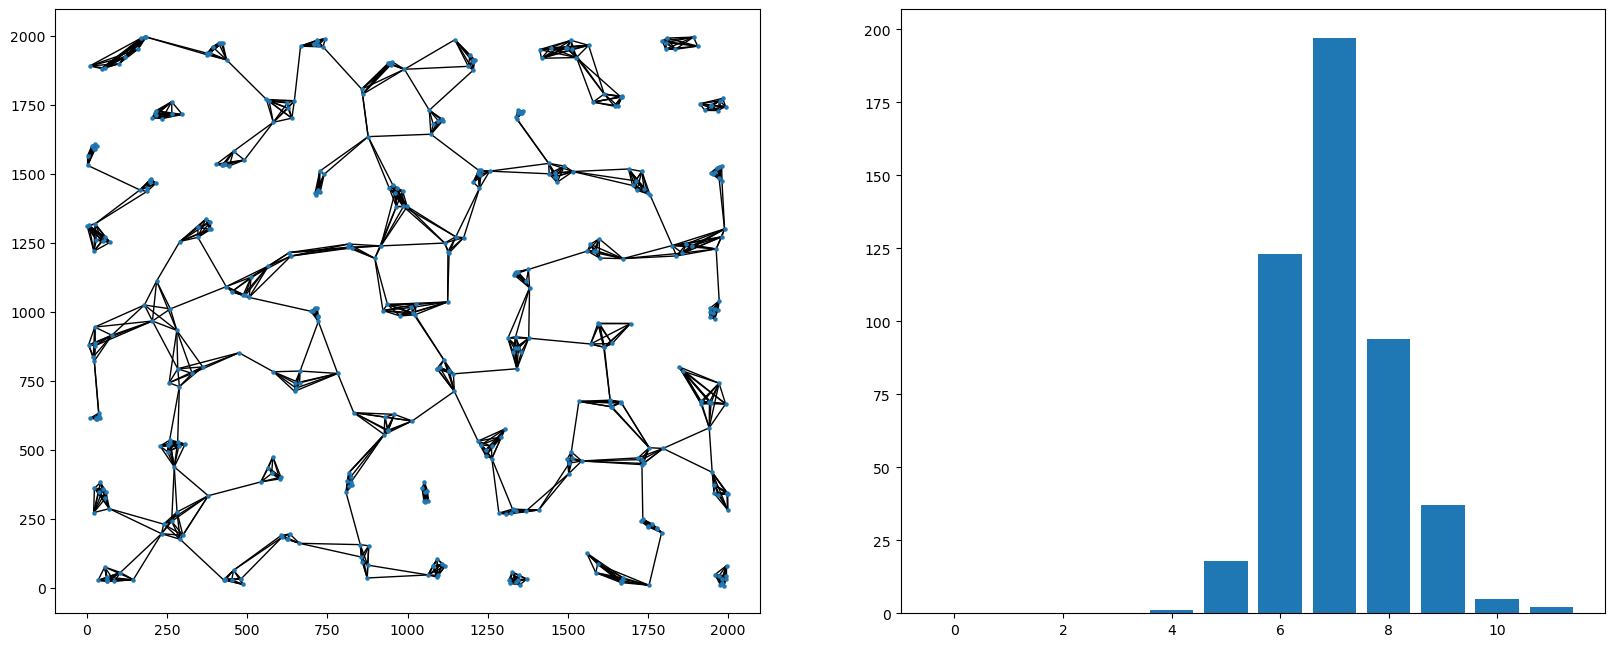

In [13]:
print(G.size())
my_grapher(G)

In [14]:
# First 1,000 iterations.
for i in range(900):
    pos_n = disperse(G,r_dispersal,pos_n)
    death(G)
    Size.append(G.size())

100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349


1849


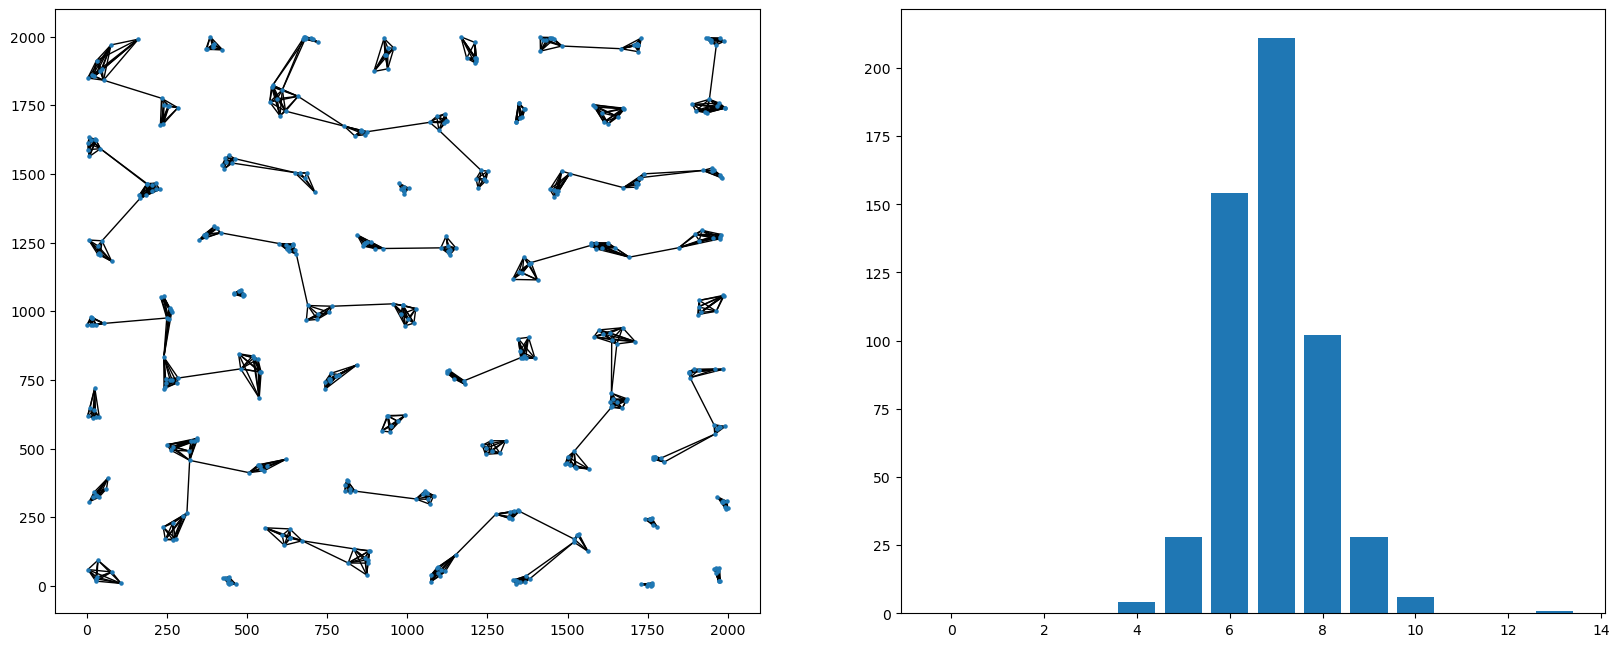

In [15]:
print(G.size())
my_grapher(G)

In [16]:
# First 10,000 iterations
for i in range(9000):
    pos_n = disperse(G,r_dispersal,pos_n)
    death(G)
    Size.append(G.size())

1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199


2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845


4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4364
4365
4366
4367
4368
4369
4370
4371
4372
4373
4374
4375
4376
4377
4378
4379
4380
4381
4382
4383
4384
4385
4386
4387
4388
4389
4390
4391
4392
4393
4394
4395
4396
4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4419
4420
4421
4422
4423
4424
4425
4426
4427
4428
4429
4430
4431
4432
4433
4434
4435
4436
4437
4438
4439
4440
4441
4442
4443
4444
4445
4446
4447
4448
4449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491


5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959
5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973
5974
5975
5976
5977
5978
5979
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144


7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606
7607
7608
7609
7610
7611
7612
7613
7614
7615
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635
7636
7637
7638
7639
7640
7641
7642
7643
7644
7645
7646
7647
7648
7649
7650
7651
7652
7653
7654
7655
7656
7657
7658
7659
7660
7661
7662
7663
7664
7665
7666
7667
7668
7669
7670
7671
7672
7673
7674
7675
7676
7677
7678
7679
7680
7681
7682
7683
7684
7685
7686
7687
7688
7689
7690
7691
7692
7693
7694
7695
7696
7697
7698
7699
7700
7701
7702
7703
7704
7705
7706
7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742
7743
7744
7745
7746
7747
7748
7749
7750
7751
7752
7753
7754
7755
7756
7757
7758
7759
7760
7761
7762
7763
7764
7765
7766
7767
7768
7769
7770
7771
7772
7773
7774
7775
7776
7777
7778
7779
7780
7781
7782
7783
7784
7785
7786
7787
7788
7789
7790


9231
9232
9233
9234
9235
9236
9237
9238
9239
9240
9241
9242
9243
9244
9245
9246
9247
9248
9249
9250
9251
9252
9253
9254
9255
9256
9257
9258
9259
9260
9261
9262
9263
9264
9265
9266
9267
9268
9269
9270
9271
9272
9273
9274
9275
9276
9277
9278
9279
9280
9281
9282
9283
9284
9285
9286
9287
9288
9289
9290
9291
9292
9293
9294
9295
9296
9297
9298
9299
9300
9301
9302
9303
9304
9305
9306
9307
9308
9309
9310
9311
9312
9313
9314
9315
9316
9317
9318
9319
9320
9321
9322
9323
9324
9325
9326
9327
9328
9329
9330
9331
9332
9333
9334
9335
9336
9337
9338
9339
9340
9341
9342
9343
9344
9345
9346
9347
9348
9349
9350
9351
9352
9353
9354
9355
9356
9357
9358
9359
9360
9361
9362
9363
9364
9365
9366
9367
9368
9369
9370
9371
9372
9373
9374
9375
9376
9377
9378
9379
9380
9381
9382
9383
9384
9385
9386
9387
9388
9389
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9405
9406
9407
9408
9409
9410
9411
9412
9413
9414
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9425
9426
9427
9428
9429
9430


1967


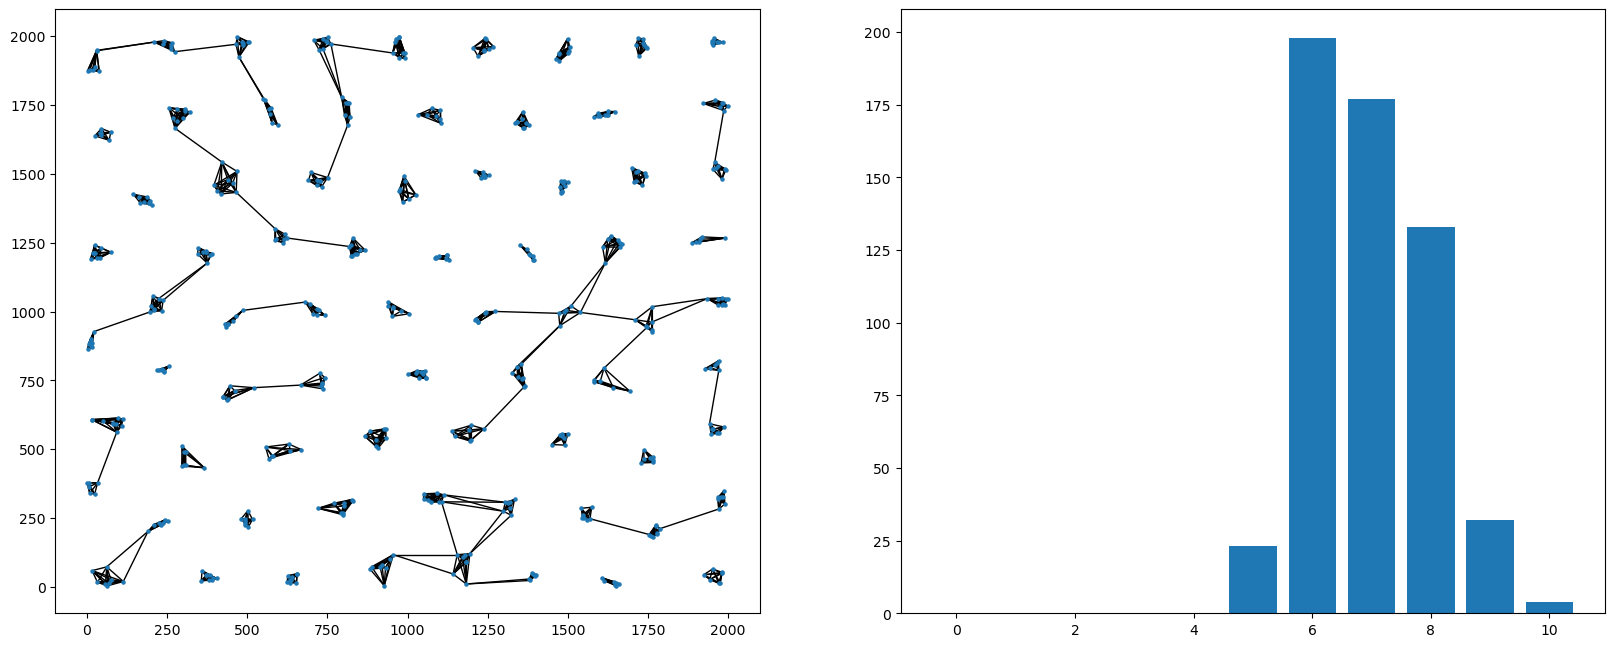

In [17]:
print(G.size())
my_grapher(G)

In [2]:
# 100,000 iterations reached
for i in range(90000):
    pos_n = disperse(G,r_dispersal,pos_n)
    death(G)
    Size.append(G.size())

NameError: name 'disperse' is not defined

1765


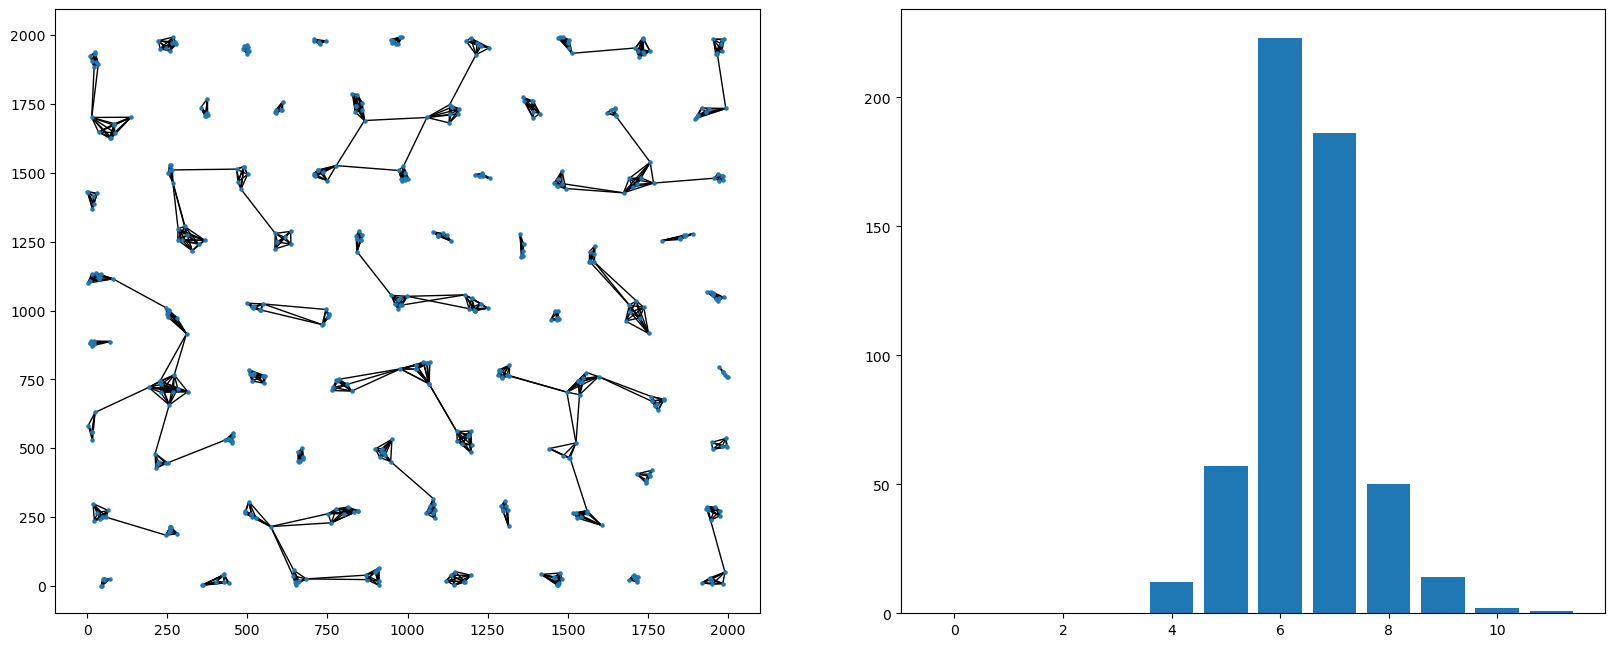

In [19]:
print(G.size())
my_grapher(G)

In [3]:
# Plot the population size
plt.plot(range(len(Size)),Size)
plt.xlabel('Iterations')
plt.ylabel('Population Size');

NameError: name 'Size' is not defined